**Прямое дискретное преобразование Фурье (ДПФ):**

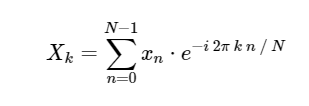

(2.0031111715897957e-14-500.00000000000045j)


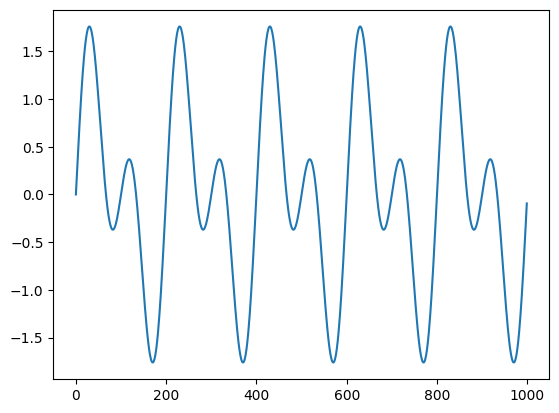

In [4]:
import numpy as np
import matplotlib.pyplot as plt

f = 5
i = 10
t = np.arange(0,1,0.001)
x = np.sin(2*np.pi*f*t) + np.sin(2*np.pi*10*t)
N = x.shape[0]
n = np.arange(N)
k = n.reshape((N, 1))
M = np.exp(-2j*np.pi*k*n/N)
Mk = np.dot(M, x)
Mi = M[i]
sp_line = Mk[i]
plt.plot(x)
# plt.ylim(0, np.max(x))
print(sp_line)
s = np.dot(np.exp(-2j*np.pi*k[i]*n/N) , x)


(1000, 1) (1000,) (1000, 1000) (1000,)


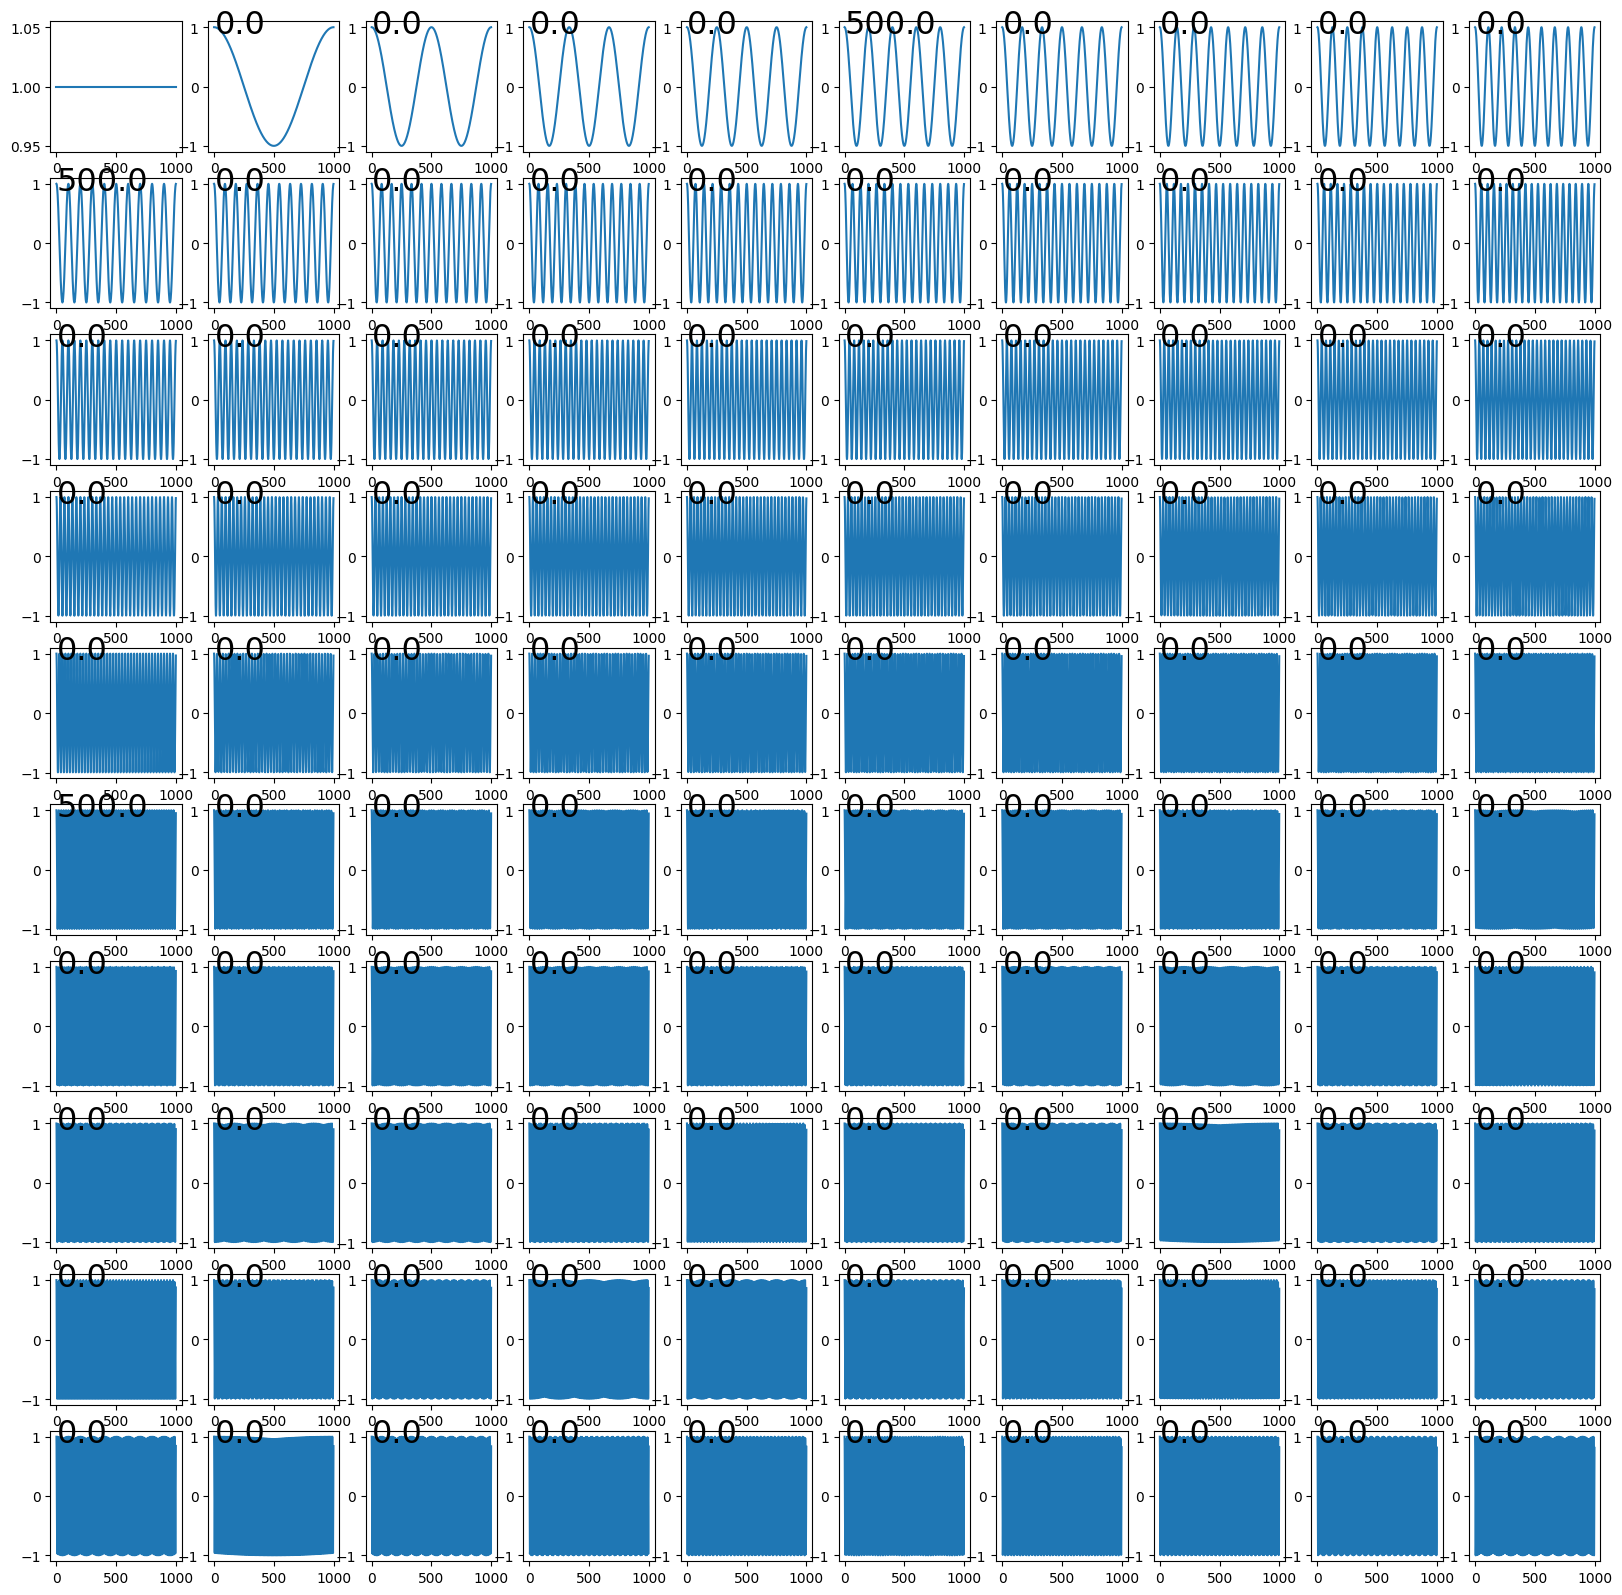

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = 5
t = np.arange(0,1,0.001)
x = np.sin(2*np.pi*f*t) + np.sin(2*np.pi*10*t) + np.sin(2*np.pi*50*t)
N = x.shape[0]
n = np.arange(N)
k = n.reshape((N, 1))
M = np.exp(-2j*np.pi*k*n/N)
Xk = np.dot(M,x)

plt.figure(figsize=[20, 20])
for i in range(100):
  plt.subplot(10, 10, i+1)
  plt.plot(M[i])
  freq = str(round(abs(Xk[i]), 3))
  plt.text(3.5, 0.9, freq, fontsize = 23)


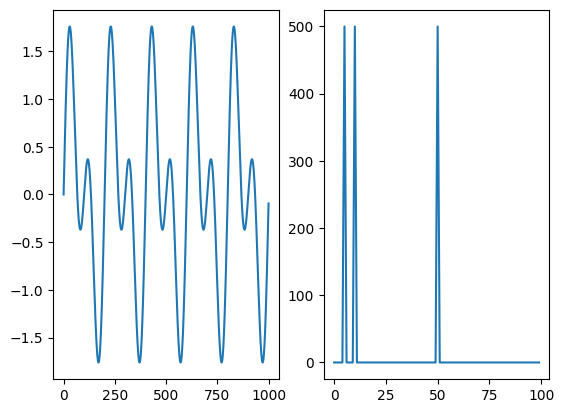

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(x)
plt.subplot(1, 2, 2)
plt.plot(abs(Xk)[0:100])

Time: 0.23469018936157227


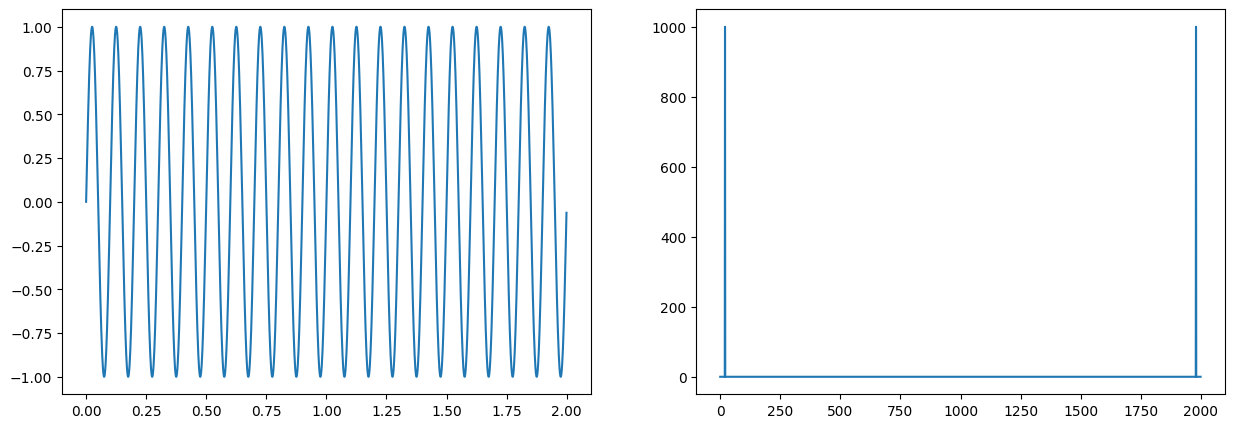

In [5]:
import time
import cmath
import numpy as np


def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)
Ts=0.001
t = np.arange(0,2,Ts)
f0 = 10
x = np.sin(2*np.pi*f0*t)
N = x.shape[0]

start = time.time()
Xk = DFT_slow(x)
end = time.time()
print('Time:', end - start)
f = np.arange(0, 1/Ts)
# plot
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.plot(t,x)
plt.subplot(1,2,2)
plt.plot(abs(Xk))



**Обратное дискретное преобразование Фурье (ОДПФ):**

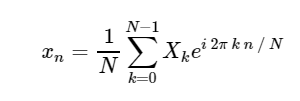

In [ ]:
# обратное
def IDFT_slow(Xk):
    """Compute the inverse discrete Fourier Transform of the 1D spectrum Xk"""
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)/N
    return np.dot(M, Xk)

s = IDFT_slow(Xk)
plt.plot(s)

In [7]:
x = np.random.random(1024)
np.allclose(DFT_slow(x), np.fft.fft(x))

True

In [8]:
%timeit DFT_slow(x)
%timeit np.fft.fft(x)

110 ms ± 24.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
17.7 µs ± 579 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
